Hello world

In [22]:

import matplotlib.pyplot as plt

import seaborn as sns

import rpy2
import rpy2.robjects as robjects
import rpy2.robjects.packages as rpackages

import pandas as pd

In [65]:
from rpy2.robjects.packages import importr
# import R's "base" package
base = importr('base')

# import R's "utils" package
utils = importr('utils')


In [76]:
# R package names
packnames = (
    'ggplot2', 
    'hexbin',
    'scatterplot3d',
    'spatstat',
    'alphahull',
    'dixon')

# R vector of strings
from rpy2.robjects.vectors import StrVector

# Selectively install what needs to be install.
# We are fancy, just because we can.
names_to_install = list(filter(lambda x: ~rpackages.isinstalled(x), packnames))
if len(names_to_install) > 0:
    print(names_to_install)
    utils.install_packages(StrVector(names_to_install))

['ggplot2', 'hexbin', 'scatterplot3d', 'spatstat', 'alphahull', 'dixon']


/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: also installing the dependencies ‘stringi’, ‘colorspace’, ‘stringr’, ‘munsell’, ‘sp’, ‘MASS’, ‘plyr’, ‘reshape2’, ‘scales’, ‘lazyeval’, ‘lattice’, ‘spatstat.data’, ‘nlme’, ‘rpart’, ‘spatstat.utils’, ‘mgcv’, ‘Matrix’, ‘deldir’, ‘polyclip’, ‘goftest’, ‘tripack’, ‘sgeostat’, ‘splancs’


  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: 

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: 
  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: The downloaded source packages are in
	‘/tmp/RtmpGUbYAk/downloaded_packages’
  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Updating HTML index of packages in '.Library'


In [67]:
import numpy as np

In [68]:
galaxy_data_loc = 'efigi.csv'
df = pd.read_csv(galaxy_data_loc)
df['DCom'] = pd.to_numeric(df['DCom'], errors='coerce')
df = df.dropna(how='any')

In [69]:
df.head()

,PGC,Name,RA,Dec,DCom,T,B.T,armC,armS,armR,barL,iRing,oRing,pRing,Pert,vDust,pDust,floc,spot,inc
13,963,UGC00139,3.6331,-0.7379,56.0,6,0.25,0.50,0.50,1.0,0.00,0.00,0.0,0.0,0.25,0.50,0.5,0.75,0.25,0.50
15,1221,PGC001221,4.7087,-10.3617,115.2,6,0.25,1.00,0.00,1.0,0.00,0.00,0.0,0.0,1.00,0.75,0.5,0.50,0.50,0.25
16,1224,PGC001224,4.7120,-10.3769,114.4,3,0.50,0.50,0.25,1.0,0.25,0.25,0.0,0.0,1.00,0.50,0.5,0.75,0.50,0.00
22,1523,NGC0099,5.9979,15.7705,76.4,6,0.25,0.75,0.50,1.0,0.00,0.00,0.0,0.0,0.50,0.50,0.5,0.75,0.25,0.00
27,1805,UGC00295,7.3874,-1.0959,248.2,4,0.50,0.75,0.00,1.0,0.75,0.00,0.0,0.0,0.00,0.50,0.5,0.50,0.00,0.50


## III Examine spatial distribution of full and trimmed sample
 Divide T morphological measure into classical galaxy classes

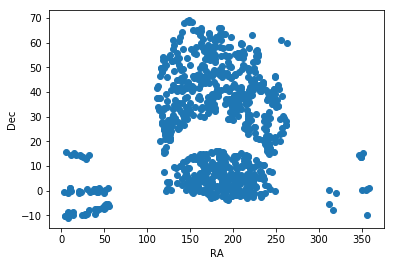

In [70]:
plt.plot()
plt.scatter(df['RA'], df['Dec'])
plt.xlabel('RA')
plt.ylabel('Dec')
plt.savefig('ra_and_dec.png')

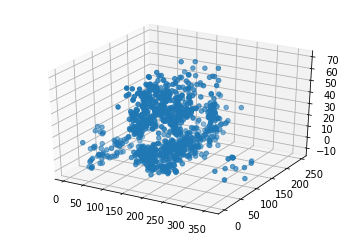

In [71]:
from mpl_toolkits.mplot3d import Axes3D
# See https://matplotlib.org/2.1.1/gallery/mplot3d/scatter3d.html
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
df = df.dropna(subset=['DCom'], how='any')
ax.scatter(df['RA'], df['DCom'], df['Dec'])

Could probably make interactive with Bokeh

In [72]:
df.describe()

,PGC,RA,Dec,DCom,T,B.T,armC,armR,barL,iRing,oRing,pRing,Pert,vDust,pDust,floc,spot,inc
count,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,38633.389006,175.999947,23.854301,83.995666,3.960888,0.399313,0.449789,0.469080,0.270877,0.151427,0.018235,0.013214,0.244186,0.570560,0.520349,0.519820,0.147463,0.341702
std,14481.856096,57.870865,20.540591,48.310650,1.598131,0.168943,0.180724,0.476882,0.299956,0.210807,0.086054,0.091054,0.234223,0.131042,0.150117,0.239744,0.185959,0.236223
min,963.000000,3.633100,-11.113300,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,0.000000,0.000000,0.000000
25%,28188.500000,147.157700,4.836025,42.400000,3.000000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.250000,0.000000,0.250000
50%,39112.000000,183.644700,21.512600,81.900000,4.000000,0.500000,0.500000,0.250000,0.250000,0.000000,0.000000,0.000000,0.250000,0.500000,0.500000,0.500000,0.000000,0.250000
75%,51107.250000,214.627025,41.103975,115.600000,5.000000,0.500000,0.500000,1.000000,0.500000,0.250000,0.000000,0.000000,0.250000,0.687500,0.500000,0.750000,0.250000,0.500000
max,72618.000000,357.776500,69.065300,248.200000,9.000000,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.750000


## IV Construct alpha-shape (non-convex hull) polygon around 2D point distribution 
Sequence vertices in approximate clockwise order; correct mistake in polygon

In [73]:
ra = robjects.FloatVector(df['RA'])
dec = robjects.FloatVector(df['Dec'])

In [79]:
# import rpy2's package module
import rpy2.robjects.packages as rpackages
# import R's utility package
utils = rpackages.importr('utils')
# select a mirror for R packages
utils.chooseCRANmirror(ind=1) # select the first mirror in the list

# R package names
packnames = ('alphahull')

# R vector of strings
from rpy2.robjects.vectors import StrVector
# file
packnames_to_install = packnames
if len(packnames_to_install) > 0:
    utils.install_packages(StrVector(packnames_to_install))

In [81]:
base = importr('base')

In [82]:
base.install.packages()

AttributeError: module 'base' has no attribute 'install'

In [83]:
robjects.r('''
        f <- function(r, verbose=FALSE) {
            if (verbose) {
                cat("I am calling f().\n")
            }
            2 * pi * r
        }
        f(3)
        ''')

18.849556


In [85]:
robjects.r('''
    install.packages("png", "/home/user/anaconda3/lib/R/library")
        ''')


/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Warning in install.packages("png", "/home/user/anaconda3/lib/R/library") :
  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: 
 
  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning:  'lib = "/home/user/anaconda3/lib/R/library"' is not writable

  warnings.warn(x, RRuntimeWarning)


Would you like to use a personal library instead?  (y/n) y
Would you like to create a personal library
~/R/x86_64-pc-linux-gnu-library/3.4
to install packages into?  (y/n) y


/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: 

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: 
  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: The downloaded source packages are in
	‘/tmp/RtmpGUbYAk/downloaded_packages’
  warnings.warn(x, RRuntimeWarning)


rpy2.rinterface.NULL

In [86]:
png = importr('png')

/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Error in loadNamespace(name) : there is no package called ‘png’

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: In addition: 
  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Warning message:

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: In install.packages("png", "/home/user/anaconda3/lib/R/library") :
  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: 
 
  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning:  installation of package ‘png’ had non-zero exit status

  warnings.warn(x, RRuntimeWarning)


RRuntimeError: Error in loadNamespace(name) : there is no package called ‘png’


In [80]:
# utils.install_packages('alphahull')
alphahull = importr('alphahull')

/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Error in loadNamespace(name) : there is no package called ‘alphahull’

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: In addition: 
  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Warning message:

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: packages ‘a’, ‘l’, ‘p’, ‘h’, ‘u’ are not available (for R version 3.4.3) 

  warnings.warn(x, RRuntimeWarning)


RRuntimeError: Error in loadNamespace(name) : there is no package called ‘alphahull’


In [74]:
ashape = rpy2.robjects.r['ashape']
ash = ashape(cbind(ra, dec), alpha=5.)

LookupError: 'ashape' not found

In [ ]:
	
RA.extreme <- RA.trim[ash$alpha.extremes] 
Dec.extreme <- Dec.trim[ash$alpha.extremes] 
    angle <- function(ra,dec) { 			
	   tmp <- ra + 1i * dec
	   outang <- 90 - Arg(tmp) / pi * 180
	   outang %% 360
	 }
poly.ind <- rank(angle(RA.extreme - mean(RA.extreme), 
     Dec.extreme - mean(Dec.extreme)))
plot(RA.trim, Dec.trim, pch=20, cex=0.3)		# not shown
lines(RA.extreme[order(poly.ind)], Dec.extreme[order(poly.ind)])

RA.extreme <- RA.extreme[-35]  ;  Dec.extreme <- Dec.extreme[-35]
poly.ind <- rank(angle(RA.extreme - mean(RA.extreme), 
     Dec.extreme - mean(Dec.extreme)))
plot(RA.trim, Dec.trim, pch=20, cex=0.3)		# not shown
lines(RA.extreme[order(poly.ind)], Dec.extreme[order(poly.ind)])